In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:\\Users\\Vedashree\\Downloads\\quora_train\\train.csv")

In [4]:
new_df=df.sample(30000,random_state=1)

In [5]:
new_df.head()

id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   

                                                question1  \
237030                How can I stop playing video games?   
247341     Who is better Donald Trump or Hillary Clinton?   
246425  What do you think is the chance that sometime ...   
306985  Why are so many questions posted to Quora that...   
225863  Can there even be a movie ever rated 10/10 on ...   

                                                question2  is_duplicate  
237030   Should I stop playing video games with my child?             0  
247341  Why is Hillary Clinton a better choice than Do...             1  
246425  Do you think there will be another world war/n...             1  
306985  Why do people write questions on Quora that co...             1  
225863                        What are your 10/10 movies?             0

In [6]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [7]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [8]:
new_df['question1']=new_df['question1'].apply(preprocess)
new_df['question2']=new_df['question2'].apply(preprocess)

In [9]:
new_df

id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   
...        ...     ...     ...   
298455  298455   88357  148625   
16366    16366   31205   31206   
379818  379818   11786  511366   
54795    54795   96691   96692   
335036  335036  462289  462290   

                                                question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   
...                                                   ...   
298455  why is donald trump still  ducking  his income...   
16366   how often do women get wet when they see a rea...   
379818  how do i disable  voice data for text to speec...   
54795                     how does mildew form on carpets   
335036                            how do i leave a legacy   

                                                question2  is_duplicate  
237030    should i stop playing video games with my child             0  
247341  why is hillary clinton a better choice than do...             1  
246425  do you think there will be another world war n...             1  
306985  why do people write questions on quora that co...             1  
225863                         what are your 10 10 movies             0  
...                                                   ...           ...  
298455  why does not trump begin speaking the  truth  ...             1  
16366   how often do women initiate a conversation wit...             0  
379818  how do i convert call center recordings into t...             0  
54795   how can you prevent mildew from forming on car...             0  
335036         how do you leave a legacy to your children             0  

[30000 rows x 6 columns]

In [10]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [11]:
#  counting no of words in both sentences

new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.strip().split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.strip().split(" ")))
new_df.head()

id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   

                                                question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   

                                                question2  is_duplicate  \
237030    should i stop playing video games with my child             0   
247341  why is hillary clinton a better choice than do...             1   
246425  do you think there will be another world war n...             1   
306985  why do people write questions on quora that co...             1   
225863                         what are your 10 10 movies             0   

        q1_len  q2_len  q1_num_words  q2_num_words  
237030      34      47             7             9  
247341      45      56             8            10  
246425     137      76            29            15  
306985      85      85            16            16  
225863      50      26            12             6

In [12]:
new_df[['question1', 'q1_num_words', 'question2', 'q2_num_words']].head()


question1  q1_num_words  \
237030                 how can i stop playing video games             7   
247341      who is better donald trump or hillary clinton             8   
246425  what do you think is the chance that sometime ...            29   
306985  why are so many questions posted to quora that...            16   
225863  can there even be a movie ever rated 10 10 on ...            12   

                                                question2  q2_num_words  
237030    should i stop playing video games with my child             9  
247341  why is hillary clinton a better choice than do...            10  
246425  do you think there will be another world war n...            15  
306985  why do people write questions on quora that co...            16  
225863                         what are your 10 10 movies             6

In [13]:
def common_words(row):
    w1=set(map(lambda word:word.lower().strip(), row['question1'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [14]:
new_df['common_words']=new_df.apply(common_words, axis=1)
new_df.head()


id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   

                                                question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   

                                                question2  is_duplicate  \
237030    should i stop playing video games with my child             0   
247341  why is hillary clinton a better choice than do...             1   
246425  do you think there will be another world war n...             1   
306985  why do people write questions on quora that co...             1   
225863                         what are your 10 10 movies             0   

        q1_len  q2_len  q1_num_words  q2_num_words  common_words  
237030      34      47             7             9             5  
247341      45      56             8            10             6  
246425     137      76            29            15            13  
306985      85      85            16            16             5  
225863      50      26            12             6             1

In [15]:
def word_total(row):
    w1=set(map(lambda word:word.lower().strip(), row['question1'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(), row['question2'].split(" ")))
    return (len(w1)+ len(w2))

In [16]:
new_df['total_words']=new_df.apply(word_total,axis=1)
new_df

id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   
...        ...     ...     ...   
298455  298455   88357  148625   
16366    16366   31205   31206   
379818  379818   11786  511366   
54795    54795   96691   96692   
335036  335036  462289  462290   

                                                question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   
...                                                   ...   
298455  why is donald trump still  ducking  his income...   
16366   how often do women get wet when they see a rea...   
379818  how do i disable  voice data for text to speec...   
54795                     how does mildew form on carpets   
335036                            how do i leave a legacy   

                                                question2  is_duplicate  \
237030    should i stop playing video games with my child             0   
247341  why is hillary clinton a better choice than do...             1   
246425  do you think there will be another world war n...             1   
306985  why do people write questions on quora that co...             1   
225863                         what are your 10 10 movies             0   
...                                                   ...           ...   
298455  why does not trump begin speaking the  truth  ...             1   
16366   how often do women initiate a conversation wit...             0   
379818  how do i convert call center recordings into t...             0   
54795   how can you prevent mildew from forming on car...             0   
335036         how do you leave a legacy to your children             0   

        q1_len  q2_len  q1_num_words  q2_num_words  common_words  total_words  
237030      34      47             7             9             5           16  
247341      45      56             8            10             6           18  
246425     137      76            29            15            13           40  
306985      85      85            16            16             5           30  
225863      50      26            12             6             1           16  
...        ...     ...           ...           ...           ...          ...  
298455      63      74            13            15             5           26  
16366       57      90            13            17             8           29  
379818      72     148            15            28             7           42  
54795       31      50             6             9             4           15  
335036      23      42             6             9             5           15  

[30000 rows x 12 columns]

In [17]:
new_df['word_share']=round(new_df['common_words']/new_df['total_words'],2)
new_df.head()

id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   

                                                question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   

                                                question2  is_duplicate  \
237030    should i stop playing video games with my child             0   
247341  why is hillary clinton a better choice than do...             1   
246425  do you think there will be another world war n...             1   
306985  why do people write questions on quora that co...             1   
225863                         what are your 10 10 movies             0   

        q1_len  q2_len  q1_num_words  q2_num_words  common_words  total_words  \
237030      34      47             7             9             5           16   
247341      45      56             8            10             6           18   
246425     137      76            29            15            13           40   
306985      85      85            16            16             5           30   
225863      50      26            12             6             1           16   

        word_share  
237030        0.31  
247341        0.33  
246425        0.32  
306985        0.17  
225863        0.06

In [18]:
# Advanced feature engineering

1. Token Features\
cwc_min: This is the ratio of the number of common words to the length of the smaller question\
cwc_max: This is the ratio of the number of common words to the length of the larger question\
csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions\
csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions\
ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions\
ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions\
last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
first_word_eq: 1 if the first word in the two questions is same, 0 otherwise\
2. Length Based Features\
mean_len: Mean of the length of the two questions (number of words)\
abs_len_diff: Absolute difference between the length of the two questions (number of words)\
longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question\
3. Fuzzy Features\
fuzz_ratio: fuzz_ratio score from fuzzywuzzy\
fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy\
token_sort_ratio: token_sort_ratio from fuzzywuzzy\
token_set_ratio: token_set_ratio from fuzzywuzzy

In [19]:
from nltk.corpus import stopwords

In [20]:
def fetch_token_features(row):
    q1= row['question1']
    q2= row['question2']
    
    SAFE_DIV=0.0001
    STOP_WORDS=stopwords.words('english')
    
    token_features =[0.0]*8  #list having 8 zeros
    
    # converting sentence into tokens
    q1_tokens= q1.split()
    q2_tokens= q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    
    # get the non-stopwords in questions
    q1_words=set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words=set([word for word in q2_tokens if word not in STOP_WORDS])
    
    # get the stopwords in questions
    q1_stops=set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops=set([word for word in q2_tokens if word in STOP_WORDS])
    
    # get the common non-stopwords from question pair
    common_word_count=  len(q1_words.intersection(q2_words))
    
    # get the common stopwords
    common_stop_count= len(q1_stops.intersection(q2_stops))
    
    # get the common tokens
    common_token_count= len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [21]:
token_features=new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [22]:
new_df

id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   
...        ...     ...     ...   
298455  298455   88357  148625   
16366    16366   31205   31206   
379818  379818   11786  511366   
54795    54795   96691   96692   
335036  335036  462289  462290   

                                                question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   
...                                                   ...   
298455  why is donald trump still  ducking  his income...   
16366   how often do women get wet when they see a rea...   
379818  how do i disable  voice data for text to speec...   
54795                     how does mildew form on carpets   
335036                            how do i leave a legacy   

                                                question2  is_duplicate  \
237030    should i stop playing video games with my child             0   
247341  why is hillary clinton a better choice than do...             1   
246425  do you think there will be another world war n...             1   
306985  why do people write questions on quora that co...             1   
225863                         what are your 10 10 movies             0   
...                                                   ...           ...   
298455  why does not trump begin speaking the  truth  ...             1   
16366   how often do women initiate a conversation wit...             0   
379818  how do i convert call center recordings into t...             0   
54795   how can you prevent mildew from forming on car...             0   
335036         how do you leave a legacy to your children             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...  total_words  \
237030      34      47             7             9  ...           16   
247341      45      56             8            10  ...           18   
246425     137      76            29            15  ...           40   
306985      85      85            16            16  ...           30   
225863      50      26            12             6  ...           16   
...        ...     ...           ...           ...  ...          ...   
298455      63      74            13            15  ...           26   
16366       57      90            13            17  ...           29   
379818      72     148            15            28  ...           42   
54795       31      50             6             9  ...           15   
335036      23      42             6             9  ...           15   

        word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
237030        0.31  0.999975  0.799984  0.333322  0.249994  0.714276   
247341        0.33  0.999980  0.833319  0.333322  0.249994  0.749991   
246425        0.32  0.857131  0.499996  0.999986  0.538457  0.866661   
306985        0.17  0.374995  0.333330  0.333328  0.285710  0.312498   
225863        0.06  0.499975  0.166664  0.000000  0.000000  0.166664   
...            ...       ...       ...       ...       ...       ...   
298455        0.19  0.285710  0.249997  0.666644  0.333328  0.363633   
16366         0.28  0.499994  0.444440  0.799984  0.571420  0.615380   
379818        0.17  0.428565  0.187499  0.499992  0.272725  0.461535   
54795         0.27  0.666644  0.499988  0.666644  0.399992  0.666656   
335036        0.33  0.999950  0.666644  0.749981  0.499992  0.833319   

         ctc_max  last_word_eq  first_word_eq  
237030  0.555549           0.0            0.0  
247341  0.599994           0.0            0.0  
246425  0.464284           0.0            0.0  
306985  0.312498           0.0            1.0  

##  Length based features

In [26]:
!pip install distance

     ------------------------------------ 180.3/180.3 kB 417.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16257 sha256=2d8265c5242ecf57867ae7efa2551d798a9613a18cbf1537e87508b96b586242
  Stored in directory: c:\users\vedashree\appdata\local\pip\cache\wheels\fb\b3\aa\04241cced6d1722b132273b1d6aafba317887ec004f48b853a
Successfully built distance


In [23]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [24]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [25]:
new_df

id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   
...        ...     ...     ...   
298455  298455   88357  148625   
16366    16366   31205   31206   
379818  379818   11786  511366   
54795    54795   96691   96692   
335036  335036  462289  462290   

                                                question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   
...                                                   ...   
298455  why is donald trump still  ducking  his income...   
16366   how often do women get wet when they see a rea...   
379818  how do i disable  voice data for text to speec...   
54795                     how does mildew form on carpets   
335036                            how do i leave a legacy   

                                                question2  is_duplicate  \
237030    should i stop playing video games with my child             0   
247341  why is hillary clinton a better choice than do...             1   
246425  do you think there will be another world war n...             1   
306985  why do people write questions on quora that co...             1   
225863                         what are your 10 10 movies             0   
...                                                   ...           ...   
298455  why does not trump begin speaking the  truth  ...             1   
16366   how often do women initiate a conversation wit...             0   
379818  how do i convert call center recordings into t...             0   
54795   how can you prevent mildew from forming on car...             0   
335036         how do you leave a legacy to your children             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   cwc_max   csc_min  \
237030      34      47             7             9  ...  0.799984  0.333322   
247341      45      56             8            10  ...  0.833319  0.333322   
246425     137      76            29            15  ...  0.499996  0.999986   
306985      85      85            16            16  ...  0.333330  0.333328   
225863      50      26            12             6  ...  0.166664  0.000000   
...        ...     ...           ...           ...  ...       ...       ...   
298455      63      74            13            15  ...  0.249997  0.666644   
16366       57      90            13            17  ...  0.444440  0.799984   
379818      72     148            15            28  ...  0.187499  0.499992   
54795       31      50             6             9  ...  0.499988  0.666644   
335036      23      42             6             9  ...  0.666644  0.749981   

         csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
237030  0.249994  0.714276  0.555549           0.0            0.0   
247341  0.249994  0.749991  0.599994           0.0            0.0   
246425  0.538457  0.866661  0.464284           0.0            0.0   
306985  0.285710  0.312498  0.312498           0.0            1.0   
225863  0.000000  0.166664  0.083333           0.0            0.0   
...          ...       ...       ...           ...            ...   
298455  0.333328  0.363633  0.307690           0.0            1.0   
16366   0.571420  0.615380  0.470585           0.0            1.0   
379818  0.272725  0.461535  0.222221           0.0            1.0   
54795   0.399992  0.666656  0.444440           1.0            1.0   
335036  0.499992  0.833319  0.555549           0.0            1.0   

        abs_len_diff  mean_len  longest_substr_ratio  
237030           2.0       8.0              0.771429  
247341           2.0       9.0              0.347826  
246425          13.0      

In [26]:
!pip install fuzzywuzzy

## Fuzzy features

In [27]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    # 4 fuzzy features
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [28]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [29]:
new_df.shape

(30000, 28)

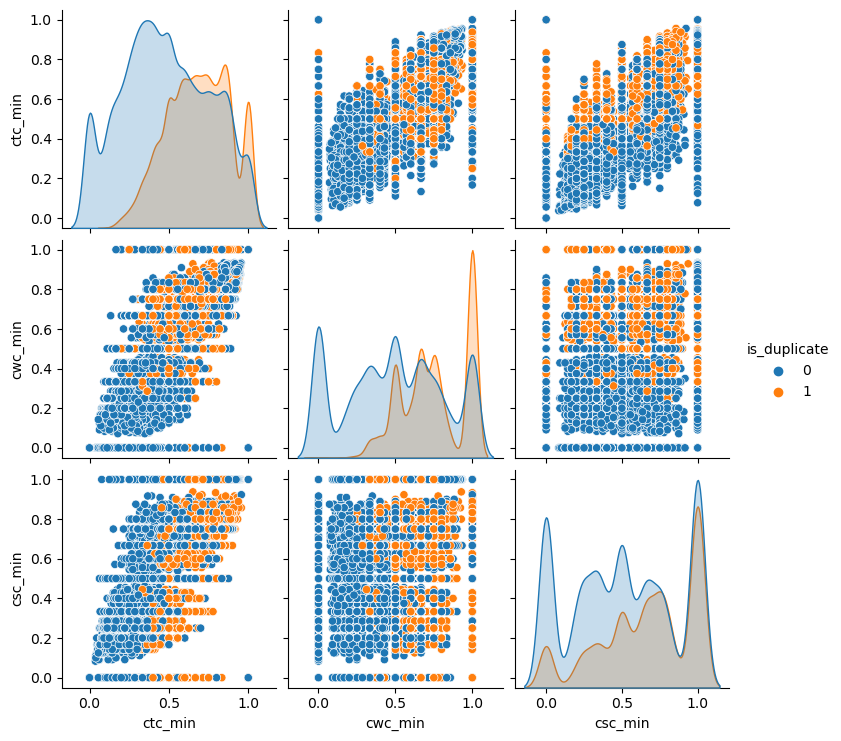

In [30]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')
plt.show()

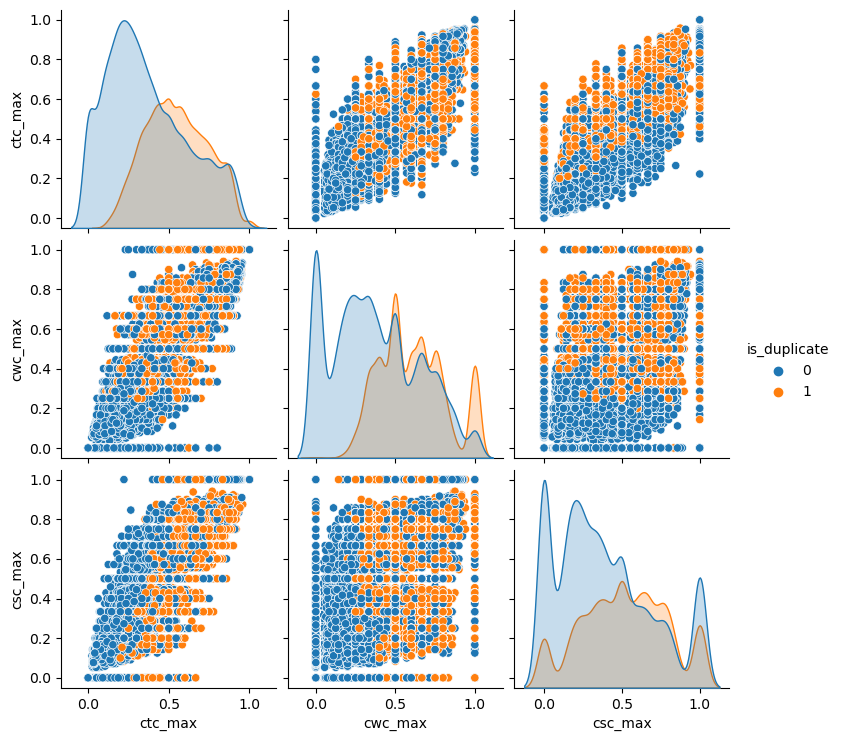

In [36]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')
plt.show()

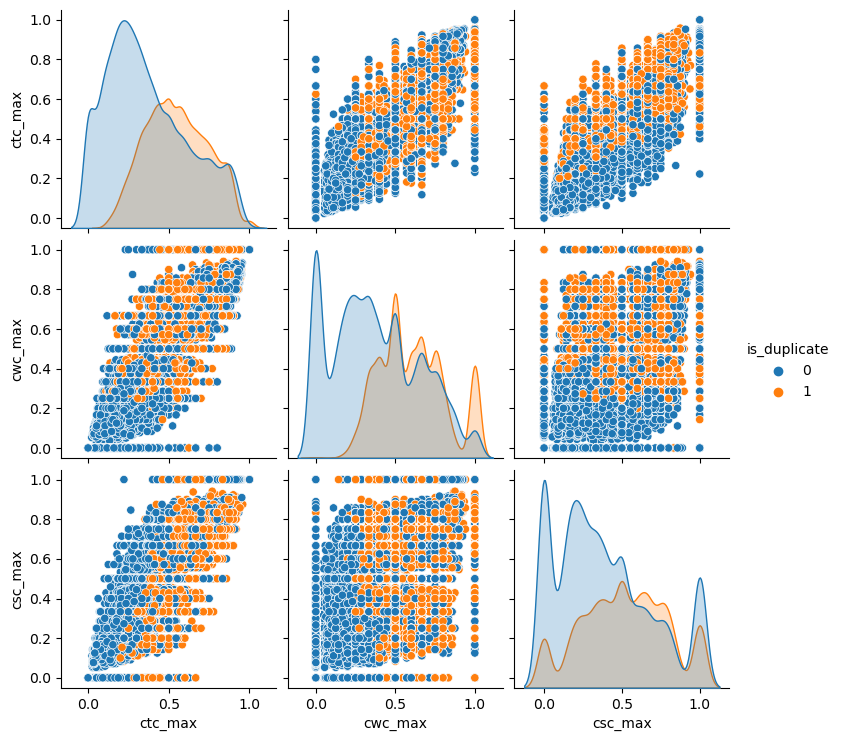

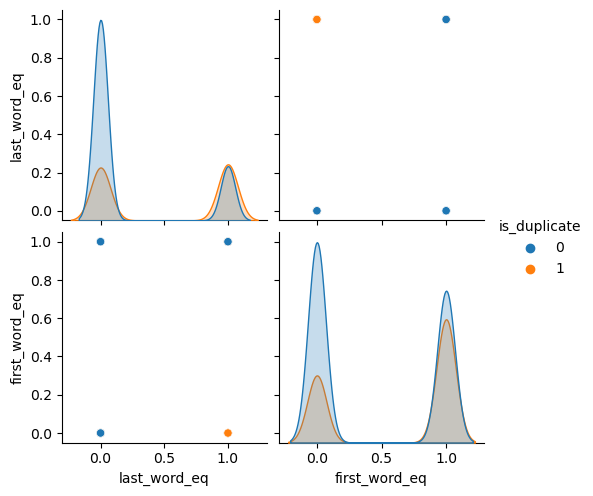

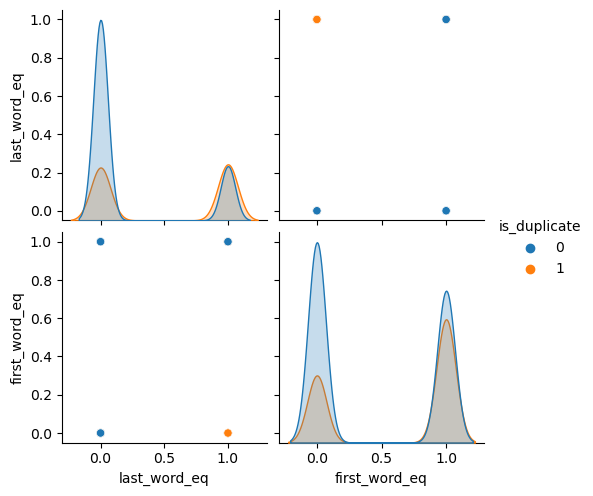

In [35]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq','is_duplicate']],hue='is_duplicate')
plt.show()

In [38]:
# from the above plot we can infer that, if last words / first words are not matching , then there's a high
# probability of not being duplicates

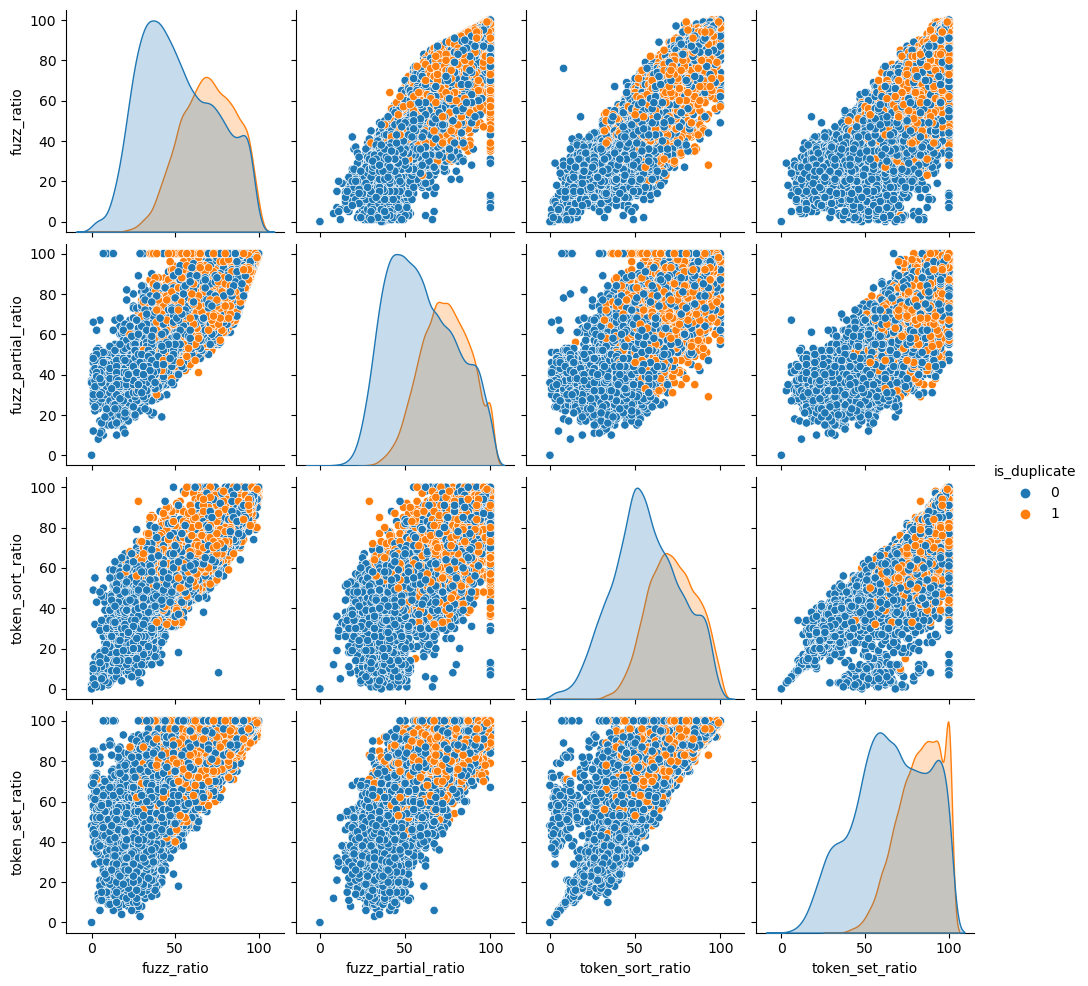

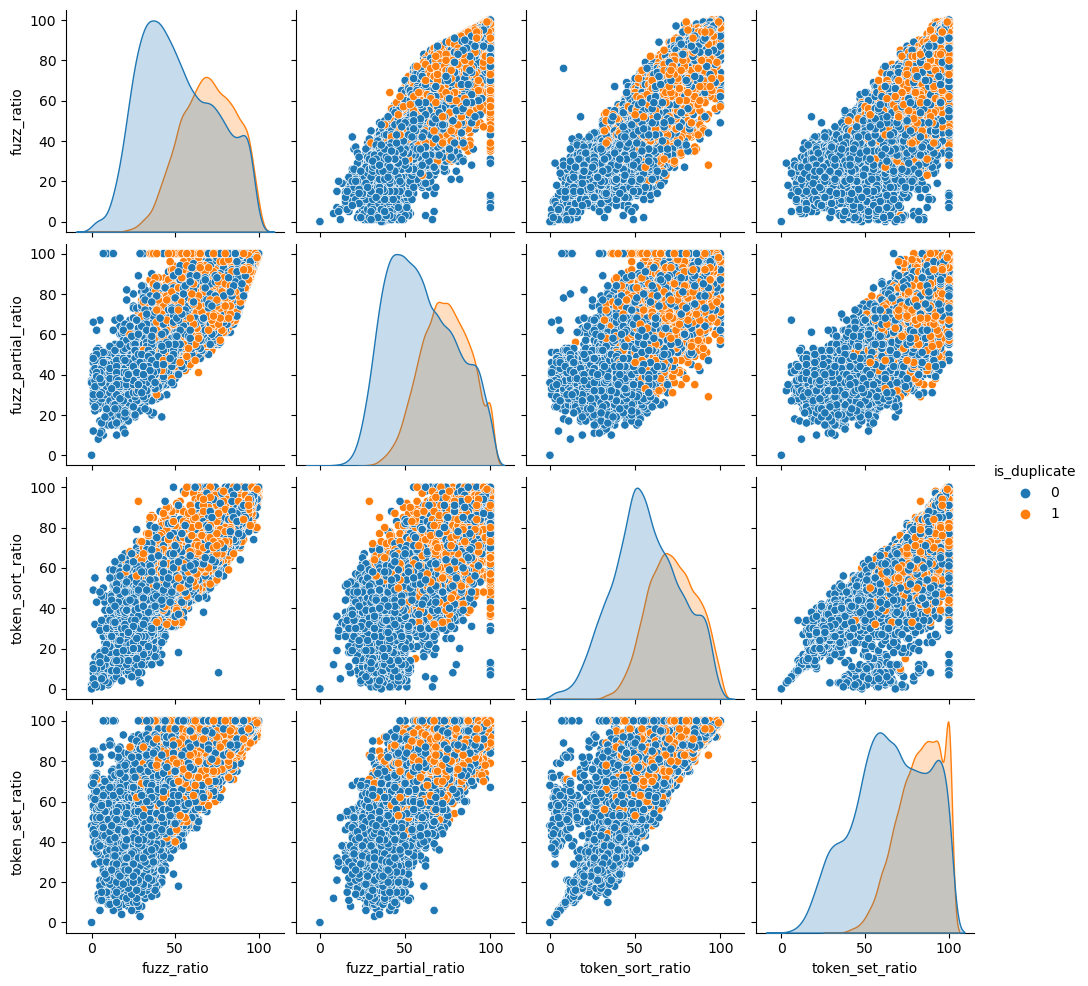

In [40]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')
plt.show()

In [41]:
# Using TSNE for dimensionality reduction for 15 features (generated after cleaning the data)
# to 3 dimensions

# t-SNE (t-Distributed Stochastic Neighbor Embedding) is a machine learning
# algorithm that helps visualize high-dimensional data in two or three dimensions

In [42]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [43]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.210s...
[t-SNE] Computed neighbors for 30000 samples in 11.107s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

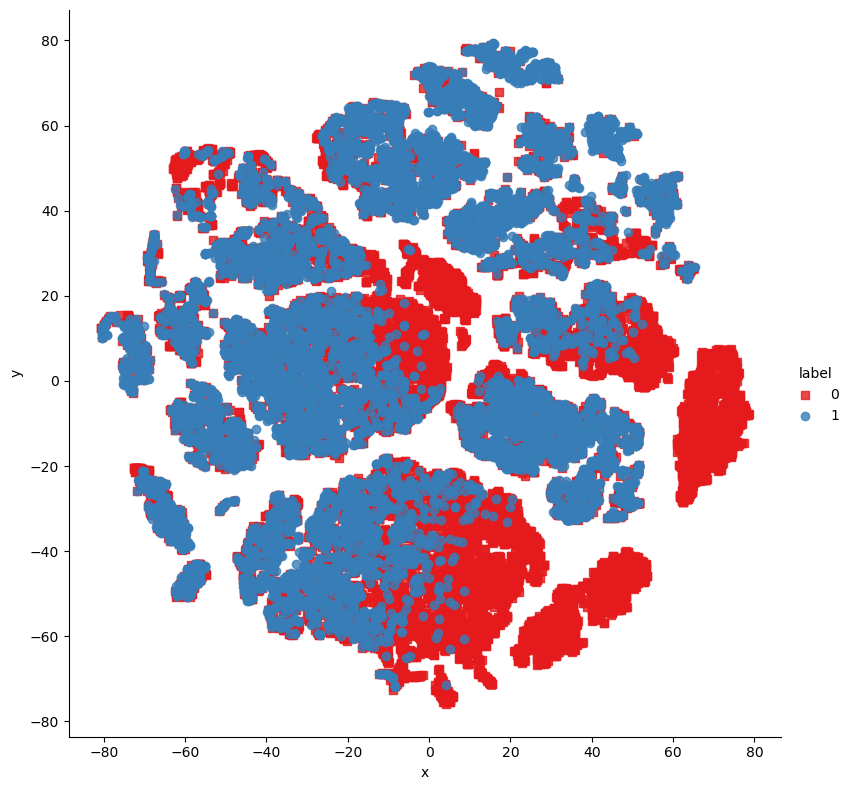

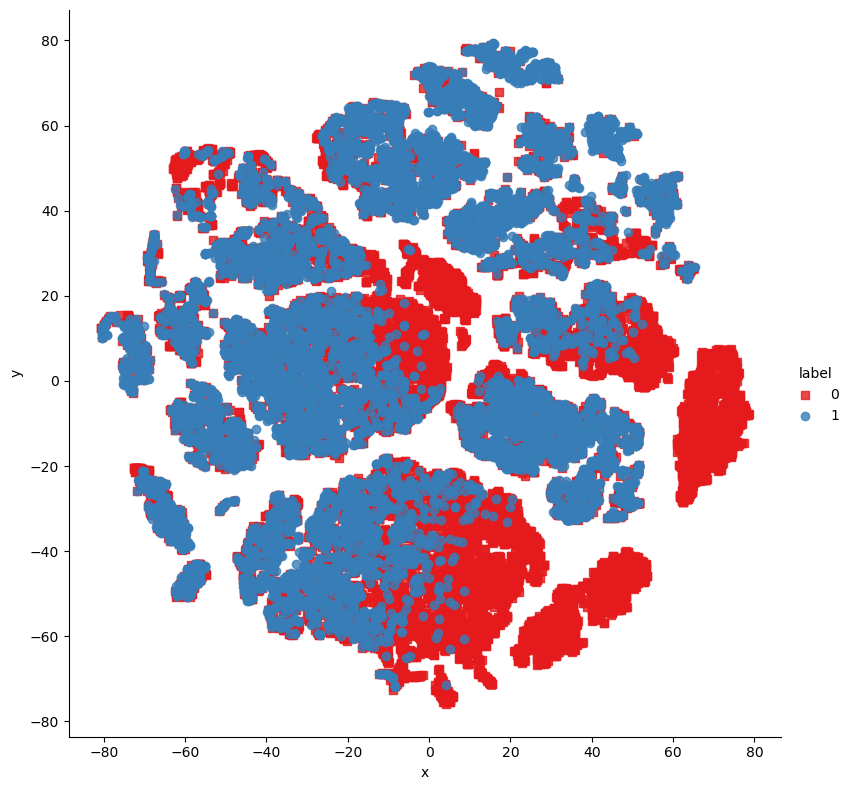

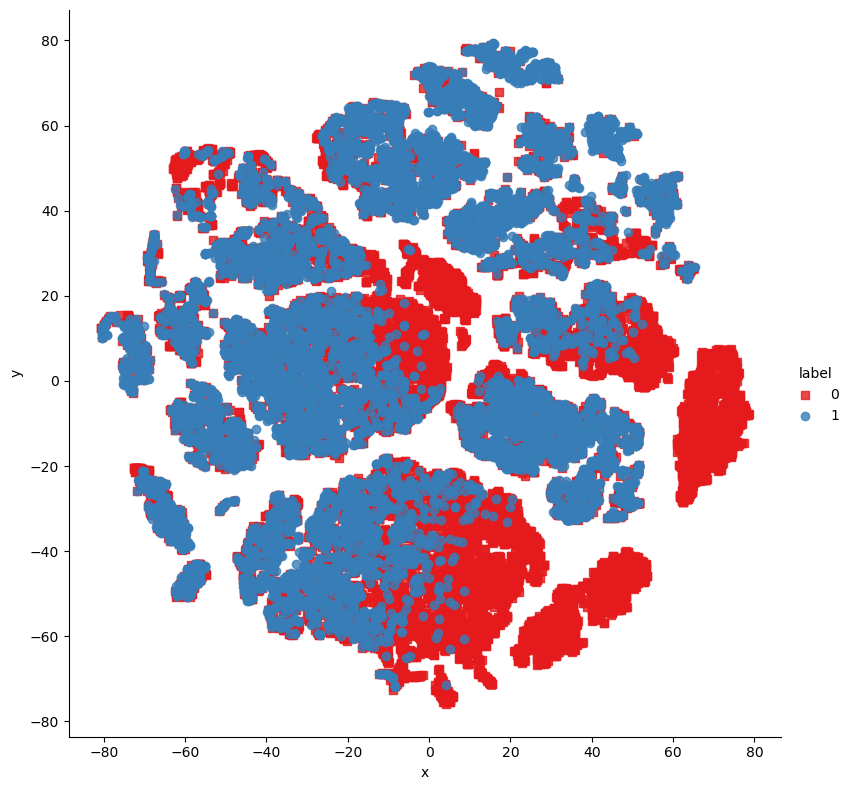

In [46]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.show()

In [47]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   

                                                question2  
237030    should i stop playing video games with my child  
247341  why is hillary clinton a better choice than do...  
246425  do you think there will be another world war n...  
306985  why do people write questions on quora that co...  
225863                         what are your 10 10 movies

In [48]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  \
237030             0      34      47             7             9   
247341             1      45      56             8            10   
246425             1     137      76            29            15   
306985             1      85      85            16            16   
225863             0      50      26            12             6   

        common_words  total_words  word_share   cwc_min   cwc_max  ...  \
237030             5           16        0.31  0.999975  0.799984  ...   
247341             6           18        0.33  0.999980  0.833319  ...   
246425            13           40        0.32  0.857131  0.499996  ...   
306985             5           30        0.17  0.374995  0.333330  ...   
225863             1           16        0.06  0.499975  0.166664  ...   

         ctc_max  last_word_eq  first_word_eq  abs_len_diff  mean_len  \
237030  0.555549           0.0            0.0           2.0       8.0   
247341  0.599994           0.0            0.0           2.0       9.0   
246425  0.464284           0.0            0.0          13.0      21.5   
306985  0.312498           0.0            1.0           0.0      16.0   
225863  0.083333           0.0            0.0           6.0       9.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
237030              0.771429          72                  85   
247341              0.347826          42                  49   
246425              0.298701          46                  55   
306985              0.139535          53                  53   
225863              0.259259          42                  46   

        token_sort_ratio  token_set_ratio  
237030                69               87  
247341                83               92  
246425                70               94  
306985                51               59  
225863                50               46  

[5 rows x 23 columns]

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [50]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [51]:
final_df=pd.concat([final_df,temp_df],axis=1)

In [52]:
final_df.head()

is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  \
237030             0      34      47             7             9   
247341             1      45      56             8            10   
246425             1     137      76            29            15   
306985             1      85      85            16            16   
225863             0      50      26            12             6   

        common_words  total_words  word_share   cwc_min   cwc_max  ...  2990  \
237030             5           16        0.31  0.999975  0.799984  ...     0   
247341             6           18        0.33  0.999980  0.833319  ...     0   
246425            13           40        0.32  0.857131  0.499996  ...     0   
306985             5           30        0.17  0.374995  0.333330  ...     0   
225863             1           16        0.06  0.499975  0.166664  ...     0   

        2991  2992  2993  2994  2995  2996  2997  2998  2999  
237030     0     0     0     0     0     0     0     0     0  
247341     0     0     0     0     0     0     0     0     0  
246425     1     0     0     0     0     0     0     0     0  
306985     0     0     0     0     0     0     0     0     0  
225863     0     0     0     1     0     0     0     0     0  

[5 rows x 6023 columns]

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

# remember y_pred for rf

0.78

In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

# y_pred1 for xgb

0.7853333333333333

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
# for random forest model
confusion_matrix(y_test, y_pred)

array([[3206,  604],
       [ 716, 1474]], dtype=int64)

In [58]:
# for xgboost

confusion_matrix(y_test, y_pred1)

array([[3183,  627],
       [ 661, 1529]], dtype=int64)

from the confusion matrices we can see that xgboost algo is making the mistake of predicting false positives(predicting those that are not duplicates as duplicate ) at a higher rate than random forest


In [59]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [60]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [61]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [62]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [63]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [64]:
def query_point_creator(q1,q2):
    input_query=[]
    
    #preprocess
    q1=preprocess(q1)
    q2=preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [70]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the current capital of India?'

In [71]:
query_point_creator(q3,q4).shape

(1, 6022)

In [76]:
rf.predict(query_point_creator(q3,q4))

array([0], dtype=int64)

In [77]:
import pickle

In [81]:
pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

In [83]:
import joblib
joblib.dump(rf, 'model.joblib')
joblib.dump(cv,'cv.joblib')

['cv.joblib']